# Tutorial 5 (Introduction to AI)

# Supervised Learning: further classifiers

# Part 3. Naive Bayes classifier

The Naive Bayes algorithm is an intuitive method that uses the probabilities of each attribute belonging to each class to make a prediction. It is the supervised learning approach you would come up with if you wanted to model a predictive modeling problem probabilistically.

Naive Bayes simplifies the calculation of probabilities by assuming that the probability of each attribute belonging to a given class value is independent of all other attributes. This is a strong assumption but results in a fast and fairly effective method.

The probability of a class value given a value of an attribute is called the conditional probability. By multiplying the conditional probabilities together for each attribute for a given class value, we have a probability of a data instance belonging to that class.

To make a prediction we can calculate probabilities of the instance belonging to each class and select the class value with the highest probability.

Naive Bayes is often described using categorical data because it is easy to describe and calculate using ratios. A more useful version of the algorithm for our purposes supports numeric attributes and assumes the values of each numerical attribute are normally distributed (fall somewhere on a bell curve). Again, this is a strong assumption, but still gives robust results.

**Naive Bayes** classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then we can compare the following values:

$$
P(L_1~|~{\rm features}) = P({\rm features}~|~L_1)*P(L_1) \\
P(L_2~|~{\rm features}) = P({\rm features}~|~L_2)*P(L_2)
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.

###  Building a Classifier

To create a simple Naive Bayes Classifier from scratch (we'll move on to the Scikit-learn implementation in a moment), consider a train journey. Let us assume we are in the city of Hamburg and we want to travel to Munich. We will have to change trains in Frankfurt. We know from previous train journeys that our train from Hamburg might be delayed and then we might not catch our connecting train in Frankfurt. The probability that we will not be in time for our connecting train depends on how high our possible delay will be. The connecting train will not wait for more than five minutes. Sometimes the other train is delayed as well.

The following lists 'in_time' (the train from Hamburg arrived in time to catch the connecting train to Munich) and 'too_late' (connecting train is missed) are data showing the situation over some weeks. The first component of each tuple shows the minutes the train was late and the second component shows the number of time this occurred.

In [ ]:
# the tuples consist of (delay time of train1, number of times)
# tuples are (minutes, number of times)
in_time = [(0, 22), (1, 19), (2, 17), (3, 18),
           (4, 16), (5, 15), (6, 9), (7, 7),
           (8, 4), (9, 3), (10, 3), (11, 2)]
too_late = [(6, 6), (7, 9), (8, 12), (9, 17),
            (10, 18), (11, 15), (12,16), (13, 7),
            (14, 8), (15, 5)]

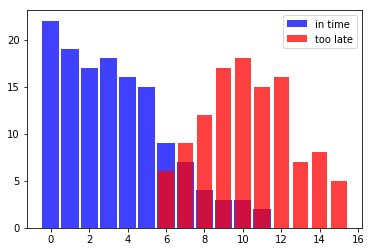

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
X, Y = zip(*in_time)
X2, Y2 = zip(*too_late)
bar_width = 0.9
plt.bar(X, Y, bar_width,  color="blue", alpha=0.75, label="in time")
bar_width = 0.8
plt.bar(X2, Y2, bar_width,  color="red", alpha=0.75, label="too late")
plt.legend(loc='upper right')
plt.show()

From this data we can deduce that the probability of catching the connecting train if we are one minute late is 1, because we had 19 successful cases experienced and no misses, i.e. there is no tuple with 1 as the first component in 'too_late'.

We will denote the event "train arrived in time to catch the connecting train" with S (success) and the 'unlucky' event "train arrived too late to catch the connecting train" with M (miss)

We can now define the probability "catching the train given that we are 1 minute late" formally:

P(S|1)=19/19=1

We used the fact that the tuple (1,19) is in 'in_time' and there is no tuple with the first component 1 in 'too_late'

If we are 6 minutes late, it's getting critical for catching the connecting train to Munich. Yet, the chances are still 60 %:

P(S|6)=9/9+6=0.6

Accordingly, the probability for missing the train knowing that we are 6 minutes late is:

P(M|6)=6/9+6=0.4

We can write a 'classifier' function, which will give the probability for catching the connecting train:

In [ ]:
in_time_dict = dict(in_time)
too_late_dict = dict(too_late)
def catch_the_train(min):
    s = in_time_dict.get(min, 0)
    if s == 0:
        return 0
    else:
        m = too_late_dict.get(min, 0)
        return s / (s + m)
for minutes in range(-1, 13):
    print(minutes, catch_the_train(minutes))

-1 0
0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 0.6
7 0.4375
8 0.25
9 0.15
10 0.14285714285714285
11 0.11764705882352941
12 0


## Naive Bayes classifier with Scikit-learn

### Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian Naive Bayes.
In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution*.
Imagine that you have the following data:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

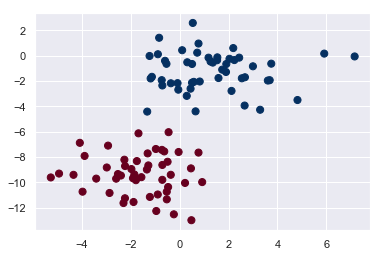

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.

[(-15, 5), (-8, 8)]

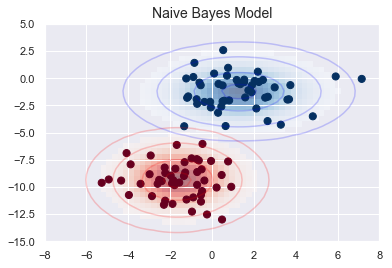

In [ ]:
#from sklearn.datasets import make_blobs
#X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)

ax.set(xlim=xlim, ylim=ylim)

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses.
With this generative model in place for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

This procedure is implemented in Scikit-Learn's ``sklearn.naive_bayes.GaussianNB`` estimator:

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Now let's generate some new data and predict the label:

In [ ]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Now we can plot this new data to get an idea of where the decision boundary is:

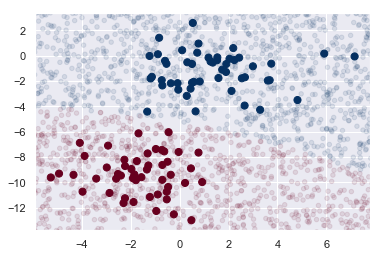

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the ``predict_proba`` method:

In [ ]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

The columns give the posterior probabilities of the first and second label, respectively.
If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results. Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

## Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label.

Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution.

The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.

### Example: Text classification

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.

The 20 Newsgroups dataset consists of a large number of newgroups posts, arranged by topic, and comes pre-split into training and testing.  We will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [ ]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [ ]:
categories = ['sci.electronics', 'sci.med', 'comp.graphics', 'rec.sport.baseball']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Here is a representative entry from the data:

In [ ]:
print(train.data[5])

From: hcb@netcom.com (H. C. Bowman)
Subject: 8x oversampling CD player
Keywords: oversampling, CD, digitized audio
Organization: Box of Rain Productions
Lines: 27


Hello--

I just bought a new portable CD player for the office, and I notice that
it proudly proclaims "8 TIMES OVERSAMPLING" on the box.  Now while I think
I understand what oversampling is (the rate of discrete "samples"
exceeds the highest frequency component of interest by some factor),
I don't understand this "8 TIMES" business...  It seems to me that when
I bought my first CD player (was it REALLY 10 years ago?!), the specs
said "4 TIMES" ...  Could someone please tell me whether I'm getting
senile?  If I'm not, then what good does it do for the player to take
samples at a higher rate?  If I really wanted better fidelity, wouldn't
I have to have the same higher rate of sampling during the recording
process?  Furthermore, am I wrong in interpreting the sampling rate
(from the player's point of view) as being the same t

In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#non-pipelined
#vec = TfidfVectorizer()
#train_vec = vec.fit_transform(train.data)
#test_vec = vec.transform(test.data)
#model = MultinomialNB()


model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data, and predict labels for the test data:

In [ ]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

#non-pipelined
#model.fit(train_vec, train.target)
#labels = model.predict(test_vec)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator. For example, here is the confusion matrix between the true and predicted labels for the test data:

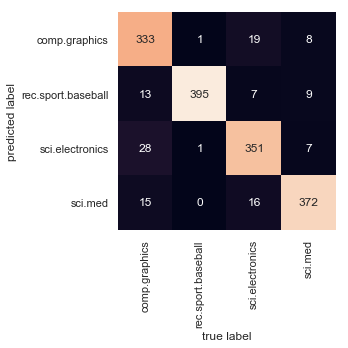

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate graphics talk from baseball talk, but it finds distinguishing talk about electronics and talk about graphics a little more difficult.  Perhaps this is to be expected.

The important thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    print(train.target_names)
    return train.target_names[pred[0]]

Let's try it out:

In [ ]:
predict_category('the circuit board is now ready')

['comp.graphics', 'rec.sport.baseball', 'sci.electronics', 'sci.med']


'sci.electronics'

In [ ]:
predict_category('Babe Ruth hits a home run')

['comp.graphics', 'rec.sport.baseball', 'sci.electronics', 'sci.med']


'rec.sport.baseball'

In [ ]:
predict_category('determining the screen resolution')

['comp.graphics', 'rec.sport.baseball', 'sci.electronics', 'sci.med']


'comp.graphics'

The model a probability distribition and the output is the probability for each category, the highest being the decision.  You can see more detail here, where the probability in position 2 is the highest for the nonsense string.

In [ ]:
s = 'carpet bread aardvark telescope phone'
print(predict_category(s))
print(model.predict([s]))
print(model.predict_proba([s]))

['comp.graphics', 'rec.sport.baseball', 'sci.electronics', 'sci.med']
sci.electronics
[2]
[[0.20371955 0.21299008 0.35434531 0.22894506]]


**Note:** This is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking. Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

## Summary

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.
That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.

## Exercises

Work with the "Breast cancer wisconsin (diagnostic) dataset" that comes with sklearn (it can be loaded with load_breast_cancer()).  Build a classifier using each of the following types of model, adjust parameters and compare the results:
1. k Nearest Neighbour
2. Random Forest
3. Gaussian Naive Bayes